In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import time
from datetime import datetime
from google.colab import files
import matplotlib.pyplot as plt

In [44]:
def plotting_predictions(df_pre):
  # Convert timestamp to datetime (if not already done)
  df_pre['timestamp'] = pd.to_datetime(df_pre['timestamp'])

  # Create a line plot
  plt.figure(figsize=(12, 6))
  plt.plot(df_pre['timestamp'], df_pre['pre_price'], label='Predicted Price (pre_price)', color='blue', marker='o', markersize=4)
  plt.plot(df_pre['timestamp'], df_pre['real_price'], label='Real Price (real_price)', color='red', marker='o', markersize=4)

  # Add labels and title
  plt.xlabel('Timestamp')
  plt.ylabel('Price')
  plt.title('Predicted vs Real Price Over Time')
  plt.legend()
  plt.grid(True)

  # Rotate x-axis labels for better readability
  plt.xticks(rotation=45)

  # Show the plot
  plt.tight_layout()
  plt.show()

In [12]:
model_2 = tf.keras.models.load_model("model_5.h5")
scaler = MinMaxScaler()
look_back = 240

In [37]:
predicted_data = {
  "timestamp" : [],
  "pre_price" : [],
}
a = False
b = True

In [29]:
datetime.now().minute

2

In [ ]:
while b:
  if datetime.now().minute == 15 and a == False:
        print("a == True")
        a = True
        break;
while a:
    # 5 dakikalık veriyi çekme
    df = yf.download(tickers="BTC-USD", period="1d", interval="1m")
    df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
    desired_order = ["Open", "Close",	"High",	"Low", "Volume"]
    df = df[desired_order]
    df.index.rename("Timestamp", inplace=True)

    # Preprocess and normalize
    df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)

    # Get last 50 time steps as input
    test_input = df_scaled.iloc[-look_back:].values.reshape(1, look_back, df.shape[1])

    # Predict next close price
    predicted_scaled = model_2.predict(test_input)
    predicted_close = scaler.inverse_transform(
        [[0, predicted_scaled[0][0], 0, 0, 0]]
    )[0][1]
    # Get the last timestamp from the data and convert to datetime if necessary
    last_timestamp = df.index[-1]


    # Add 5 steps ahead to the timestamp (based on your data frequency, e.g., 'T' for minutes)
    predicted_timestamp = last_timestamp + pd.Timedelta(minutes=1)
    # Create a message with the prediction details
    son_btc_deger = df["Close"].iloc[-1]
    message = f"Predicted Time: {predicted_timestamp}\nPredicted Price: ${predicted_close:.2f}"

    message2 = f"Son Zaman ={last_timestamp}\nSon BTC Değeri={son_btc_deger}"

    # Print the result locally for verification
    print(message2)
    print(message)
    predicted_data["timestamp"].append(predicted_timestamp.strftime("%Y-%m-%d %H:%M:%S"))
    predicted_data["pre_price"].append(predicted_close)
    print(datetime.now())


    # Wait before making another prediction (adjust for your needs)
    time.sleep(61)  # Predict every 1 minute


In [39]:
df_pre = pd.DataFrame(columns=["timestamp", "pre_price"])
df_pre = pd.DataFrame(predicted_data)
#df_pre["real_price"] = df['Close'].iloc[50:450].reset_index(drop=True)
df_pre.to_csv("1_tahmin.csv", index=False)
pd.read_csv("1_tahmin.csv")
files.download("1_tahmin.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [41]:
pd.read_csv("1_tahmin.csv")

,timestamp,pre_price
0,2025-02-07 16:12:00,98009.972962
1,2025-02-07 16:13:00,98117.766863
2,2025-02-07 16:14:00,97934.170887
3,2025-02-07 16:15:00,97948.504586
4,2025-02-07 16:15:00,97948.504586
...,...,...
97,2025-02-07 17:49:00,97721.029083
98,2025-02-07 17:49:00,97721.029083
99,2025-02-07 17:52:00,97462.547769
100,2025-02-07 17:55:00,97584.589990


In [87]:
df = yf.download(tickers="BTC-USD", period="1d", interval="1m")
df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
desired_order = ["Open", "Close",	"High",	"Low", "Volume"]
df = df[desired_order]
df.index.rename("Timestamp", inplace=True)

df_pre.drop_duplicates(subset=['timestamp'], inplace=True)

[*********************100%***********************]  1 of 1 completed


AttributeError: 'NoneType' object has no attribute 'reset_index'

In [88]:
df_pre.reset_index(drop=True)

,timestamp,pre_price,real_price
0,2025-02-07 16:12:00,98009.972962,98170.906250
1,2025-02-07 16:13:00,98117.766863,98133.523438
2,2025-02-07 16:14:00,97934.170887,97977.132812
3,2025-02-07 16:15:00,97948.504586,97977.835938
4,2025-02-07 16:16:00,97912.253162,98221.804688
...,...,...,...
73,2025-02-07 17:48:00,97664.799658,NaN
74,2025-02-07 17:49:00,97721.029083,NaN
75,2025-02-07 17:52:00,97462.547769,NaN
76,2025-02-07 17:55:00,97584.589990,NaN


ValueError: Must have equal len keys and value when setting with an iterable

In [105]:
df_pre.loc[78:]

,timestamp,pre_price,real_price
78,2025-02-07 17:32:00,97510.512472,97601.96875
80,2025-02-07 17:33:00,97526.344678,NaN
81,2025-02-07 17:35:00,97360.171791,NaN
82,2025-02-07 17:36:00,97410.884925,NaN
84,2025-02-07 17:37:00,97476.384518,NaN
85,2025-02-07 17:39:00,97519.996030,NaN
87,2025-02-07 17:40:00,97554.823776,NaN
88,2025-02-07 17:42:00,97549.659768,NaN
89,2025-02-07 17:43:00,97567.574587,NaN
90,2025-02-07 17:44:00,97530.217019,NaN


In [107]:
df_pre.loc[78:, "real_price"] = df['Close'].iloc[815:832].values

In [108]:
df_pre

,timestamp,pre_price,real_price
0,2025-02-07 16:12:00,98009.972962,98170.906250
1,2025-02-07 16:13:00,98117.766863,98133.523438
2,2025-02-07 16:14:00,97934.170887,97977.132812
3,2025-02-07 16:15:00,97948.504586,97977.835938
5,2025-02-07 16:16:00,97912.253162,98221.804688
...,...,...,...
94,2025-02-07 17:48:00,97664.799658,97743.054688
96,2025-02-07 17:49:00,97721.029083,97641.101562
99,2025-02-07 17:52:00,97462.547769,97572.945312
100,2025-02-07 17:55:00,97584.589990,97580.250000


<ipython-input-44-85edcedf9fea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre['timestamp'] = pd.to_datetime(df_pre['timestamp'])


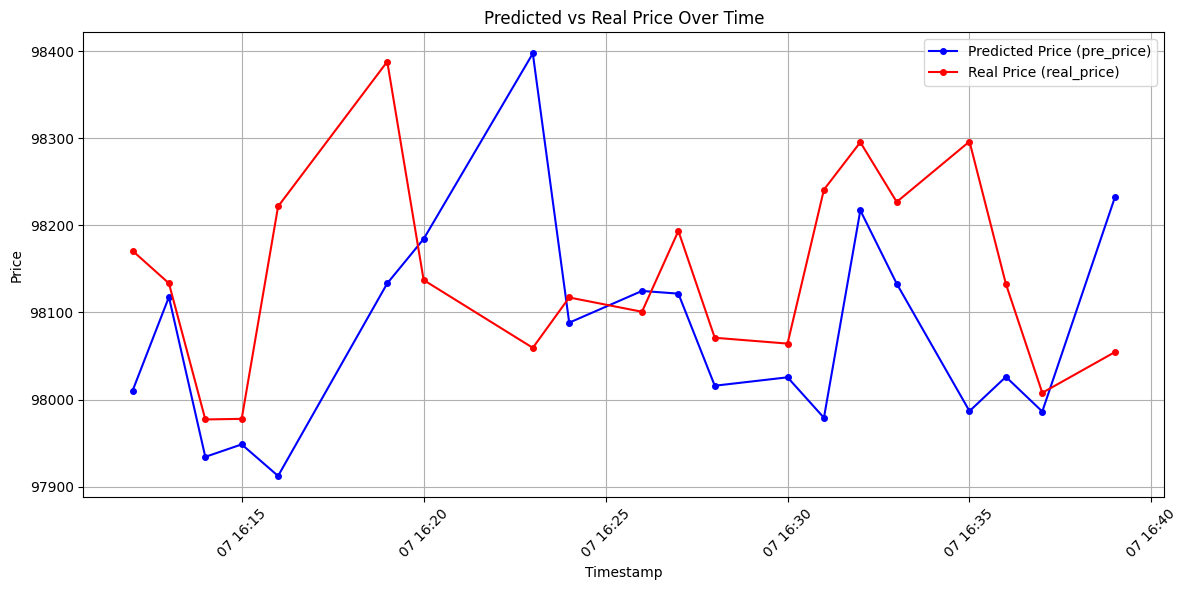

In [109]:
plotting_predictions(df_pre[:20])